# Phase diagrams for N130+rpL5 and N130(+A2)+rpL5

In [12]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style("white")
sns.set_style("ticks")
sns.set_context("paper", font_scale=1.25)

plt.rcParams['pdf.fonttype']    = 42
plt.rcParams['ps.fonttype']     = 42

plt.rcParams['xtick.color']='black'
plt.rcParams['ytick.color']='black'
plt.rcParams['text.color']='black'
plt.rcParams['axes.labelcolor']='black'
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['legend.edgecolor']='black'
plt.rcParams['xtick.direction']='out'
plt.rcParams['ytick.direction']='out'
plt.rcParams["axes.axisbelow"] = True

In [13]:
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import numpy as np
import math
import array
import scipy as sp
import numpy as np
import seaborn as sns
import pandas as pd
sns.set_style("white")
sns.set_style("ticks")
sns.set_context("paper", font_scale=1.25)
import pathlib
from matplotlib import font_manager
from scipy.interpolate import interp1d
from os import listdir
from os.path import isfile, join

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [14]:
# Setup the fonts
fonts_path = pathlib.Path('/project/fava/work/samuel.cohen/fonts')
font_filename = 'ARIAL.TTF'
font_path = fonts_path.joinpath(font_filename)
print(font_path)

font_manager.fontManager.addfont(str(font_path))
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

/project/fava/work/samuel.cohen/fonts/ARIAL.TTF


# WT

## Reading Data

In [15]:
df = pd.read_excel('PhaseDiagramData.xlsx', sheet_name='WT', index_col=0)
df

,0,50,100,150,200,250,300,350,400,450,500,600
0,4.469510,1.948673,1.651443,2.972932,3.943719,4.021011,9.863415,19.168258,35.228297,24.941104,10.582461,6.092278
25,3.665980,3.701167,2.967615,2.855729,2.716552,2.858714,4.359024,17.597180,118.613329,59.457041,34.669227,83.142372
50,3.757452,3.805376,3.075502,3.106302,2.965851,3.283855,8.401092,45.550140,382.701931,256.253035,71.908308,37.530613
75,3.054619,2.908075,2.835181,2.792125,2.641309,2.806073,3.353626,21.992816,4.190286,233.051155,98.697299,43.403913
100,2.935665,2.833006,2.900195,2.718852,2.772506,2.512058,3.009093,8.768213,152.938280,22.504363,114.987795,43.617164
125,2.814050,2.670454,2.967309,2.797206,2.656837,2.408661,2.864207,3.089776,12.767225,43.506245,36.033064,13.652216
150,5.383473,2.738894,2.854872,2.743740,2.709590,4.150143,2.832704,2.998610,3.587014,3.126240,12.700414,35.006132
200,6.761533,2.708875,2.926804,2.871970,2.578237,2.932289,2.844969,3.193441,3.173607,2.824433,2.777787,11.968562


## Plotting

meta NOT subset; don't know how to subset; dropped


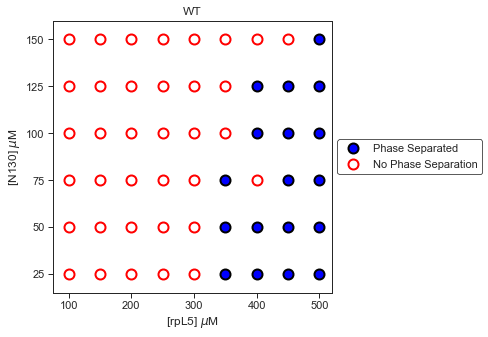

In [16]:
df = pd.read_excel('PhaseDiagramData.xlsx', sheet_name='WT', index_col=0)
N130_concs = np.array(df.index)
rpL5_concs = np.array(df.columns)
df_arr = df.to_numpy()

# Calculate the threshold as 3% of the maximum value in df_arr
threshold = 0.03 * np.max(df_arr)


plt.figure(figsize=[5,5])
plt.title("WT")

x,y=np.argwhere(df_arr >= threshold).T
plt.plot(rpL5_concs[y], N130_concs[x], 'o', ms=10, c='blue', mec='k', label='Phase Separated', mew=2)

x,y=np.argwhere(df_arr < threshold).T
plt.plot(rpL5_concs[y], N130_concs[x], 'o', ms=10, c='white', mec='red', label='No Phase Separation', mew=2)

plt.xlim(75, 520)
plt.ylim(15, 160)
plt.xticks(np.arange(100, 550, step=100))
plt.yticks([25, 50, 75, 100, 125, 150])

plt.legend(bbox_to_anchor=(1.0, 0.5), loc='center left')

plt.ylabel("[N130] $\mu$M")
plt.xlabel("[rpL5] $\mu$M")
plt.savefig("Fig1d_V2.pdf", bbox_inches='tight', transparent=True)
plt.savefig("Fig1d_V2.png", bbox_inches='tight', transparent=True)
plt.show()

meta NOT subset; don't know how to subset; dropped


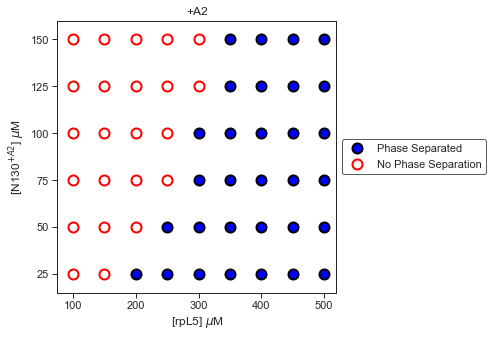

In [17]:
df = pd.read_excel('PhaseDiagramData.xlsx', sheet_name='+A2', index_col=0)
N130_concs = np.array(df.index)
rpL5_concs = np.array(df.columns)
df_arr = df.to_numpy()

# Calculate the threshold as 3% of the maximum value in df_arr
threshold = 0.03 * np.max(df_arr)


plt.figure(figsize=[5,5])
plt.title("+A2")

x,y=np.argwhere(df_arr >= threshold).T
plt.plot(rpL5_concs[y], N130_concs[x], 'o', ms=10, c='blue', mec='k', label='Phase Separated', mew=2)

x,y=np.argwhere(df_arr < threshold).T
plt.plot(rpL5_concs[y], N130_concs[x], 'o', ms=10, c='white', mec='red', label='No Phase Separation', mew=2)

plt.xlim(75, 520)
plt.ylim(15, 160)
plt.xticks(np.arange(100, 550, step=100))
plt.yticks([25, 50, 75, 100, 125, 150])

plt.legend(bbox_to_anchor=(1.0, 0.5), loc='center left')

plt.ylabel("[N130$^{+A2}$] $\mu$M")
plt.xlabel("[rpL5] $\mu$M")
plt.savefig("Fig2d_V2.pdf", bbox_inches='tight', transparent=True)
plt.savefig("Fig2d_V2.png", bbox_inches='tight', transparent=True)
plt.show()